In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option('display.max_columns',None)
%matplotlib inline

In [2]:
#Importing train dataset
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [2]:
# import io
# train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train=pd.read_csv('train.csv')
train.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

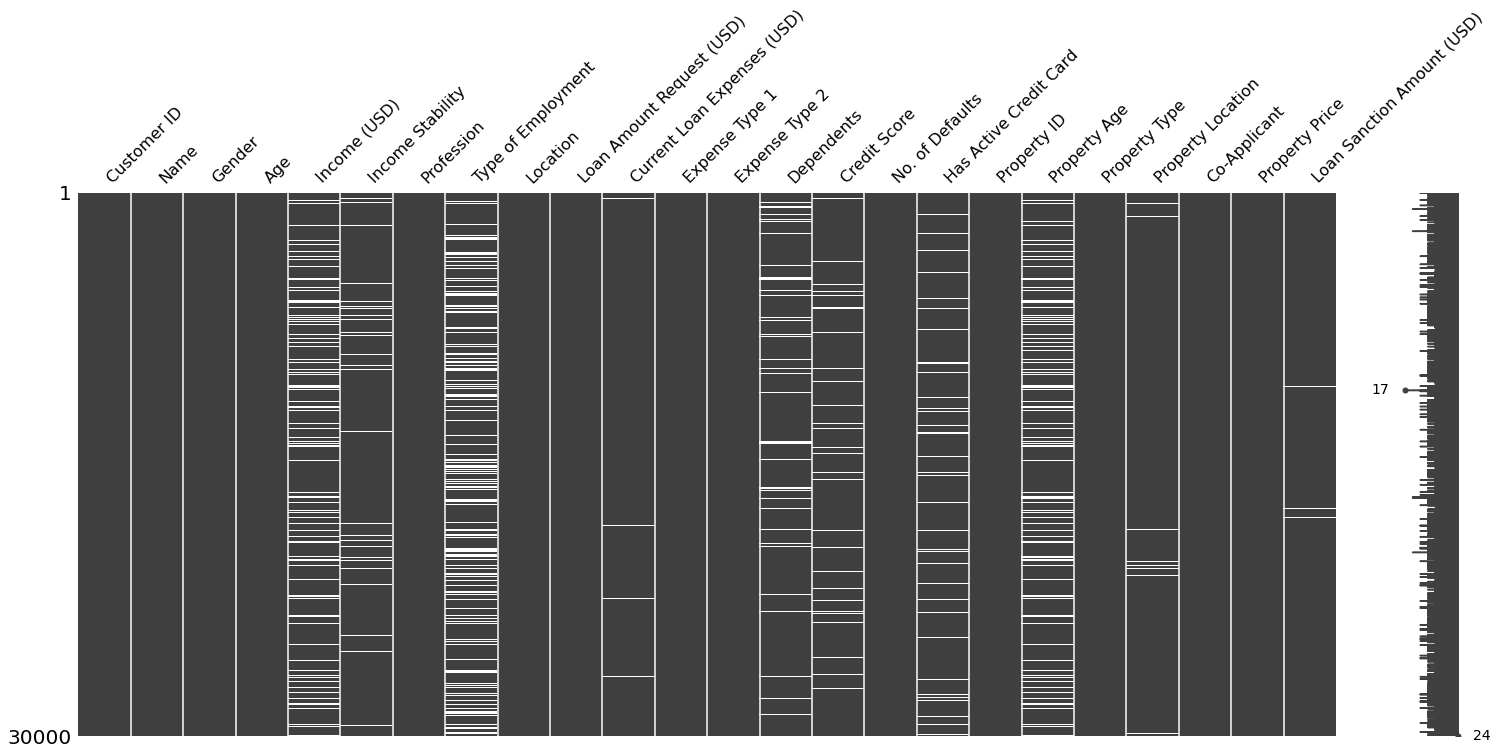

In [4]:
msno.matrix(train)

In [5]:
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [6]:
#Removing types of employment and property age and gender(no use according to datset) and rest because of high null values
train.drop(['Gender','Type of Employment','Property Age','Property Location','Dependents','Credit Score','Name','Property ID'],axis=1,inplace=True)

In [7]:
print("Has Active Credit Card:-",train['Has Active Credit Card'].unique())
print()
print("Income Stability:-",train['Income Stability'].unique())

Has Active Credit Card:- [nan 'Unpossessed' 'Active' 'Inactive']

Income Stability:- ['Low' 'High' nan]


In [8]:
#For null values of this(credit card) dataset we can assume null values could mean unpossessed or rather inactive so filling by random choice
import random
train['Has Active Credit Card'].fillna(random.choice(train['Has Active Credit Card'][train['Has Active Credit Card'].notna()]),inplace=True)

#For income stability we can assume null values mean low or no
train['Income Stability'].fillna('Low',inplace=True)

In [9]:
#As data is a continuous dataset so replacing null values with mean
train['Income (USD)'].fillna(train['Income (USD)'].mean(),inplace=True)
train['Current Loan Expenses (USD)'].fillna(train['Current Loan Expenses (USD)'].mean(),inplace=True)
train['Loan Sanction Amount (USD)'].fillna(train['Current Loan Expenses (USD)'].mean(),inplace=True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 30000 non-null  float64
 3   Income Stability             30000 non-null  object 
 4   Profession                   30000 non-null  object 
 5   Location                     30000 non-null  object 
 6   Loan Amount Request (USD)    30000 non-null  float64
 7   Current Loan Expenses (USD)  30000 non-null  float64
 8   Expense Type 1               30000 non-null  object 
 9   Expense Type 2               30000 non-null  object 
 10  No. of Defaults              30000 non-null  int64  
 11  Has Active Credit Card       30000 non-null  object 
 12  Property Type                30000 non-null  int64  
 13  Co-Applicant    

In [11]:
train.columns

Index(['Customer ID', 'Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Location', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'No. of Defaults',
       'Has Active Credit Card', 'Property Type', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


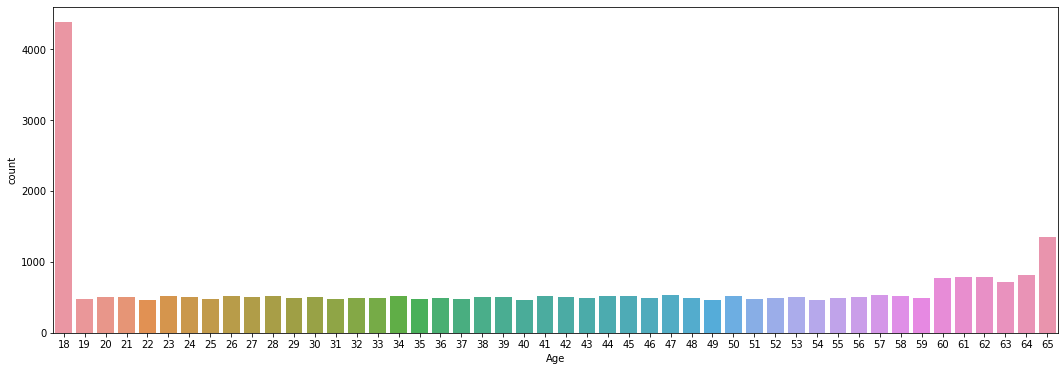

In [12]:
plt.figure(figsize=(18,6))
sns.countplot(train['Age'])

In [13]:
#Dividing the category of age and segregating through bucket

#Creating different buckets for age category
train['Age'] = pd.qcut(train['Age'], 4, labels=False)

In [14]:
kp=['Age', 'Income Stability', 'Profession',
       'Location','Expense Type 1', 'Expense Type 2', 'No. of Defaults',
       'Has Active Credit Card', 'Property Type']

In [15]:
for i in train[kp]:
  print(i,train[i].unique())
  print()

Age [3 1 2 0]

Income Stability ['Low' 'High']

Profession ['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Location ['Semi-Urban' 'Rural' 'Urban']

Expense Type 1 ['N' 'Y']

Expense Type 2 ['N' 'Y']

No. of Defaults [0 1]

Has Active Credit Card ['Inactive' 'Unpossessed' 'Active']

Property Type [4 2 1 3]



In [16]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train['Income Stability']= label_encoder.fit_transform(train['Income Stability'])
train['Profession']= label_encoder.fit_transform(train['Profession'])
train['Location']= label_encoder.fit_transform(train['Location'])
train['Expense Type 1']= label_encoder.fit_transform(train['Expense Type 1'])
train['Expense Type 2']= label_encoder.fit_transform(train['Expense Type 2'])
train['Has Active Credit Card']= label_encoder.fit_transform(train['Has Active Credit Card'])

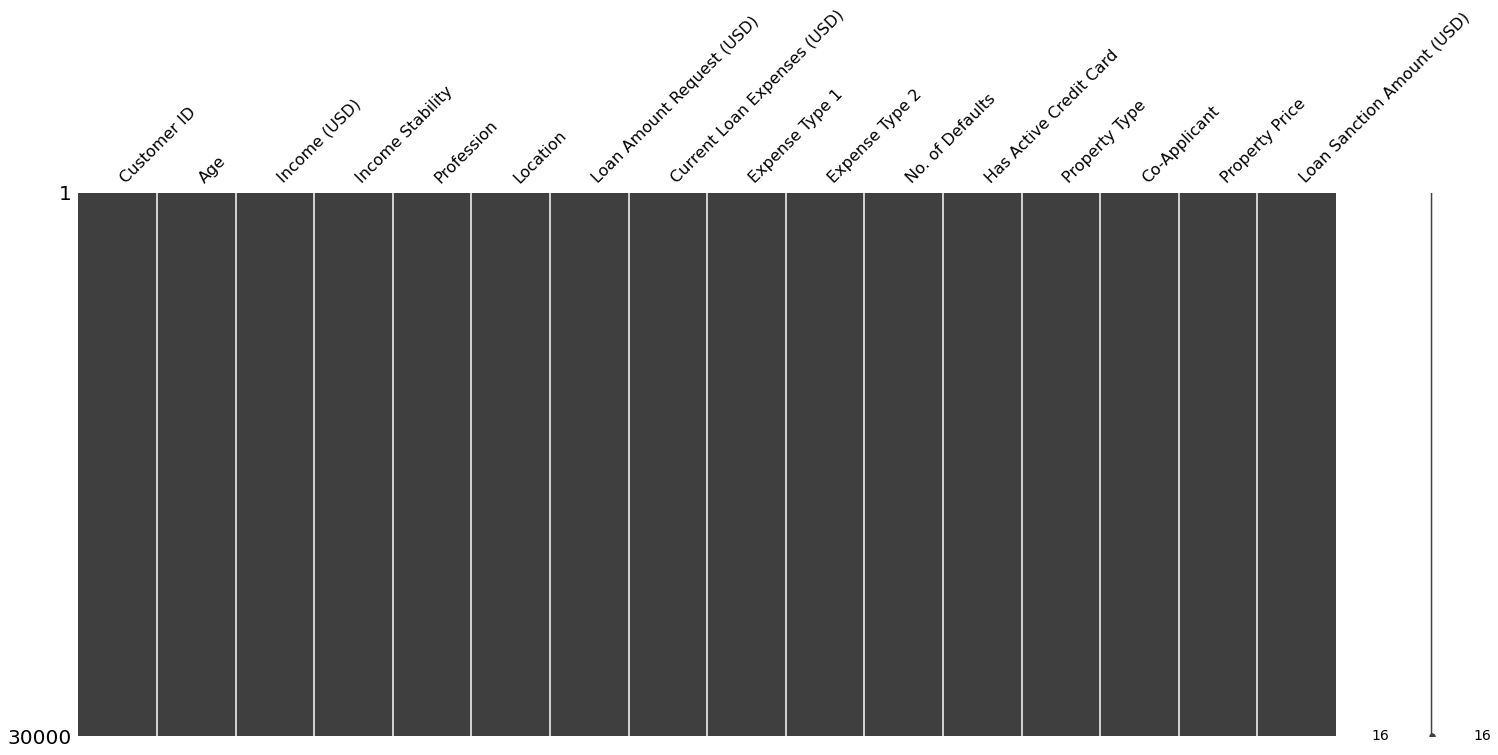

In [17]:
msno.matrix(train)

In [18]:
train.head()

,Customer ID,Age,Income (USD),Income Stability,Profession,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,No. of Defaults,Has Active Credit Card,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,3,1933.050000,1,7,1,72809.58,241.08,0,0,0,1,4,1,119933.46,54607.18
1,C-33999,1,4952.910000,1,7,1,46837.47,495.81,0,1,0,2,2,1,54791.00,37469.98
2,C-3770,3,988.190000,0,3,1,45593.04,171.95,0,1,0,2,2,0,72440.58,36474.43
3,C-26480,3,2630.574417,0,3,0,80057.92,298.54,0,1,1,2,2,1,121441.51,56040.54
4,C-23459,1,2614.770000,1,7,1,113858.89,491.41,0,1,1,0,4,1,208567.91,74008.28


In [19]:
kp=['Age', 'Income (USD)', 'Income Stability', 'Profession',
       'Location', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'No. of Defaults',
       'Has Active Credit Card', 'Property Type', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)']

In [20]:
Q1 = np.quantile(train[kp],0.02)
Q3 = np.quantile(train[kp],0.98)
IQR = Q3 - Q1

In [21]:
#Removing skewness
for i in train[kp]:
    if ((train[i].skew()>1)|(train[i].skew()<-1)):
        a=train[i].quantile(0.01)
        b=train[i].quantile(0.99)
        train[i] = np.where(train[i] <a,a,train[i])
        train[i] = np.where(train[i] >b,b,train[i])
        print(i,train[i].skew())
    else:
        print(i,train[i].skew())

Age 0.02889071153885446
Income (USD) 1.4389045749734861
Income Stability -2.964078362654189
Profession -0.5084588807441336
Location -0.08634680647259278
Loan Amount Request (USD) 1.0605135151348086
Current Loan Expenses (USD) 0.04445576552996757
Expense Type 1 0.5854733635056423
Expense Type 2 -0.7359785314751629
No. of Defaults 1.5483032763275384
Has Active Credit Card 0.034133443716841204
Property Type 0.051070209039890846
Co-Applicant -1.9663607190897674
Property Price 1.1307108726067332
Loan Sanction Amount (USD) 1.0607779022363895


###### No.of Defaults and Co-Applicant has still got skewness not according to range

In [22]:
#No.of Defaults
a=train['No. of Defaults'].quantile(0.2)
b=train['No. of Defaults'].quantile(0.8)
train['No. of Defaults'] = np.where(train['No. of Defaults'] <a,a,train['No. of Defaults'])
train['No. of Defaults'] = np.where(train['No. of Defaults'] >b,b,train['No. of Defaults'])
train['No. of Defaults'].skew()

0

In [23]:
#Co-Applicant
a=train['Co-Applicant'].quantile(0.2)
b=train['Co-Applicant'].quantile(0.8)
train['Co-Applicant'] = np.where(train['Co-Applicant'] <a,a,train['Co-Applicant'])
train['Co-Applicant'] = np.where(train['Co-Applicant'] >b,b,train['Co-Applicant'])
train['Co-Applicant'].skew()

0

In [24]:
#Co-Applicant
a=train['Income Stability'].quantile(0.2)
b=train['Income Stability'].quantile(0.8)
train['Income Stability'] = np.where(train['Income Stability'] <a,a,train['Income Stability'])
train['Income Stability'] = np.where(train['Income Stability'] >b,b,train['Income Stability'])
train['Income Stability'].skew()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


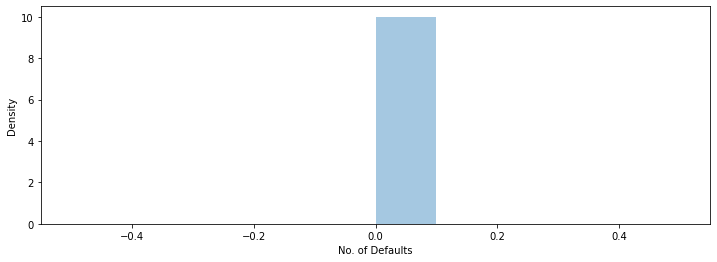

In [25]:
#### Value of Skewness of no.of deafaults falls immediately from 1.5 to 0
plt.figure(figsize=(12,4))
sns.distplot(train['No. of Defaults'],bins=10)#kde to avoid line over the plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


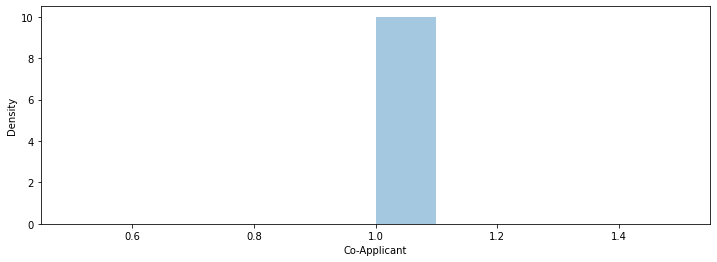

In [26]:
#### Value of Skewness of co-applicant falls immediately from -1.8 to 0
plt.figure(figsize=(12,4))
sns.distplot(train['Co-Applicant'],bins=10)#kde to avoid line over the plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


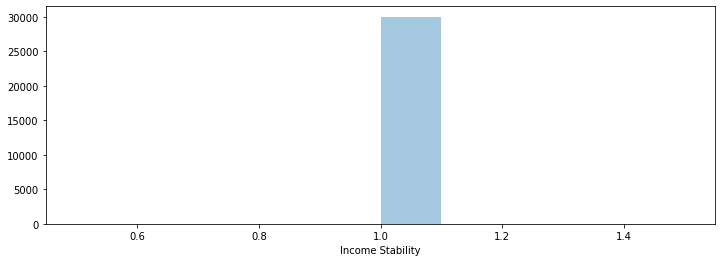

In [27]:
#### Value of Skewness of income stability falls immediately from -2.6 to 0
plt.figure(figsize=(12,4))
sns.distplot(train['Income Stability'],kde=False,bins=10)#kde to avoid line over the plots

In [28]:
#Dropping three columns as skewness achieved could be 0
train.drop(['Income Stability','No. of Defaults','Co-Applicant'],axis=1,inplace=True)

**Performing Visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


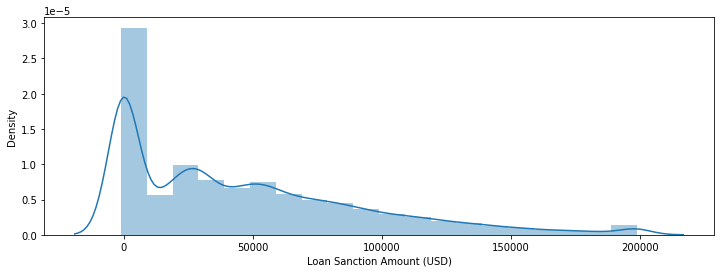

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(train['Loan Sanction Amount (USD)'],bins=20)#kde to avoid line over the plots

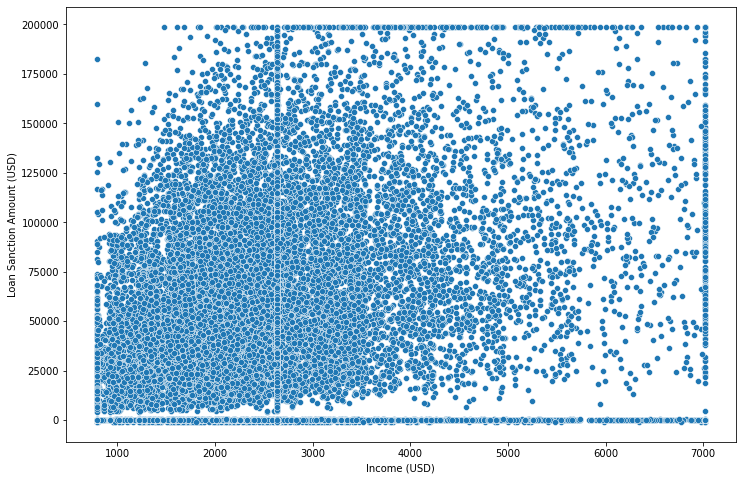

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=train['Income (USD)'],y=train['Loan Sanction Amount (USD)'])

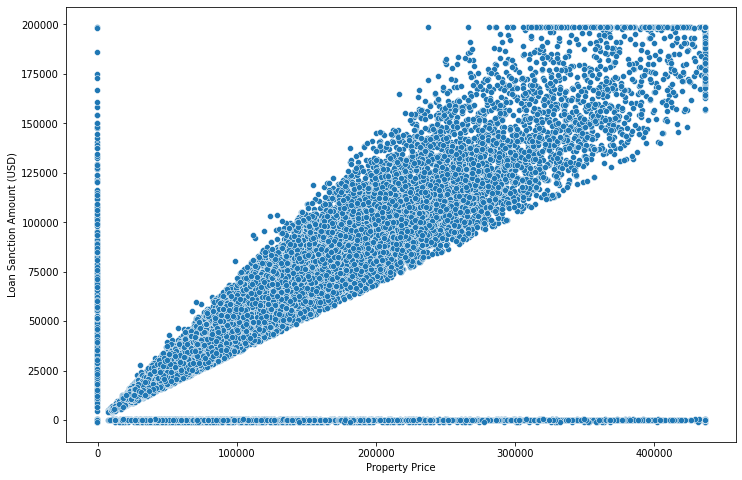

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=train['Property Price'],y=train['Loan Sanction Amount (USD)'])

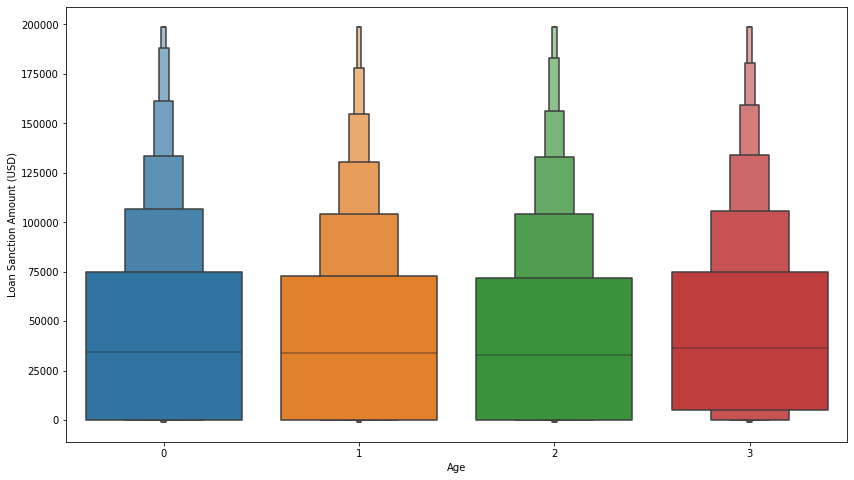

In [ ]:
plt.figure(figsize=(14,8))
sns.boxenplot(x=train['Age'],y=train['Loan Sanction Amount (USD)'])

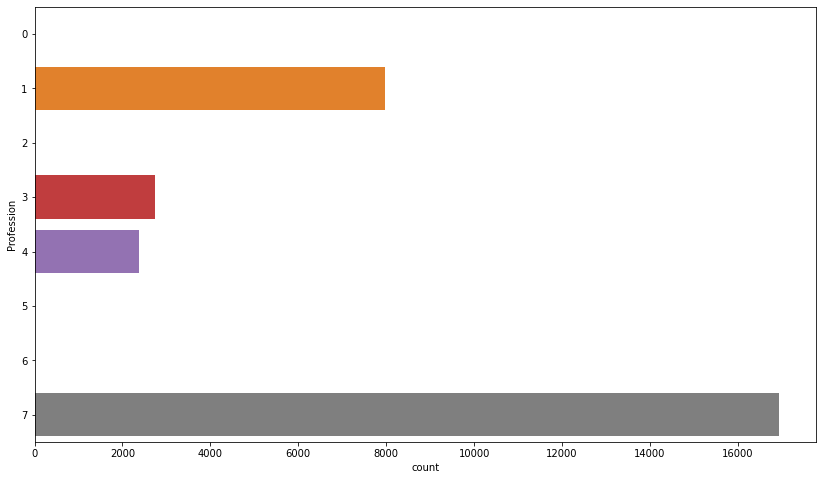

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(y=train['Profession'])

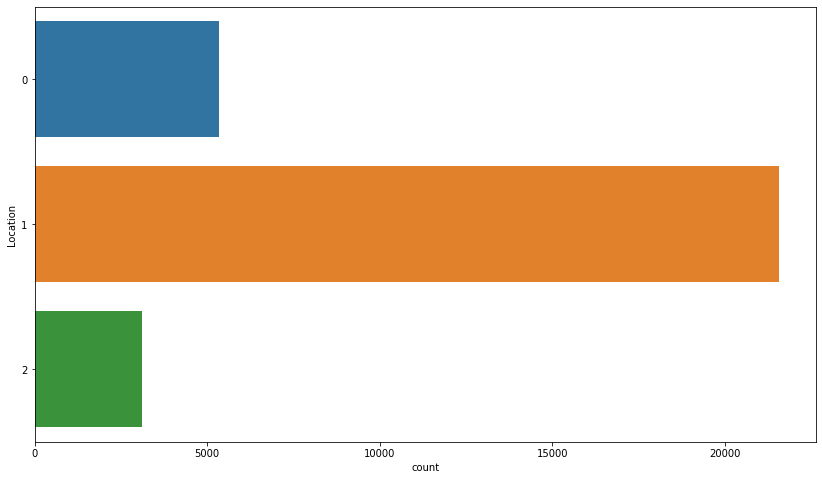

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(y=train['Location'])

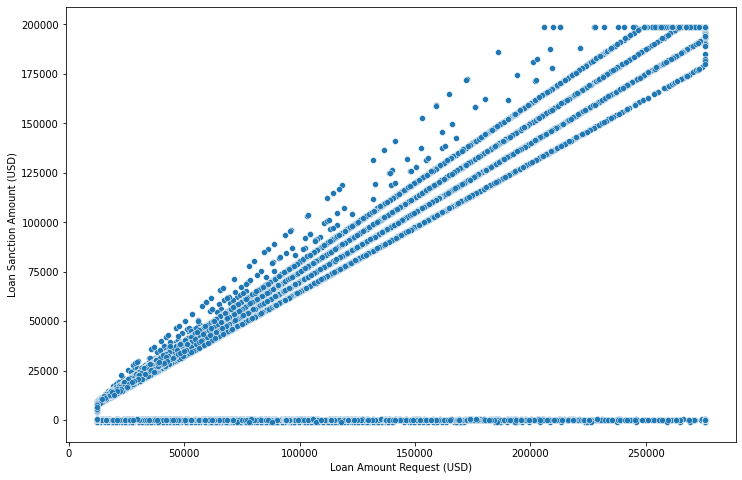

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=train['Loan Amount Request (USD)'],y=train['Loan Sanction Amount (USD)'])

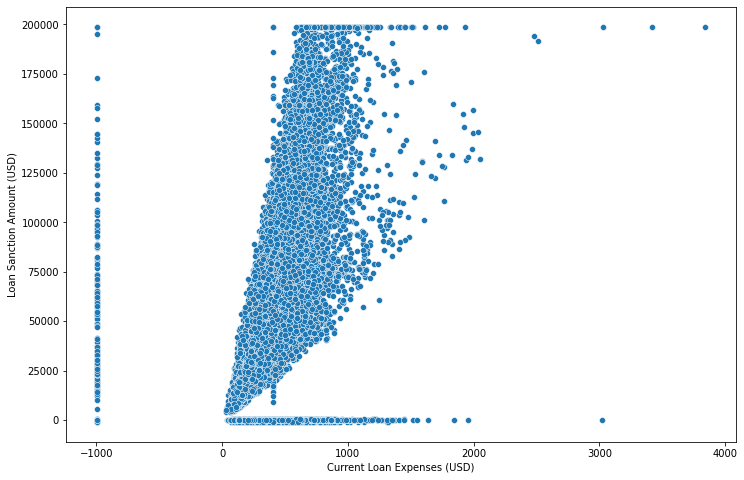

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=train['Current Loan Expenses (USD)'],y=train['Loan Sanction Amount (USD)'])

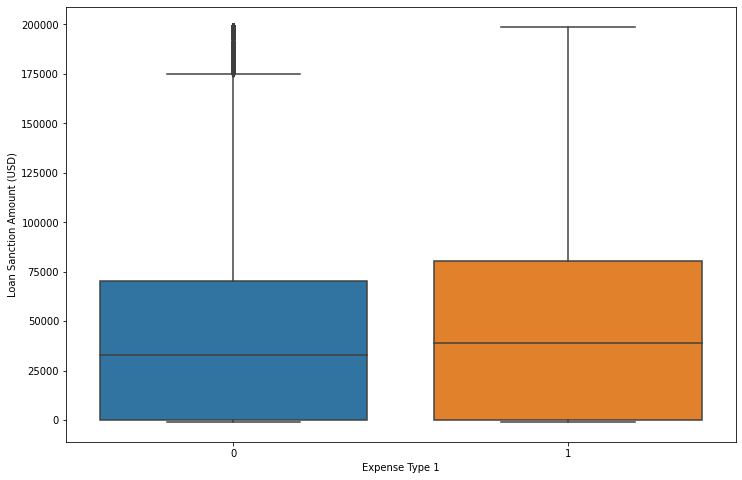

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x=train['Expense Type 1'],y=train['Loan Sanction Amount (USD)'])

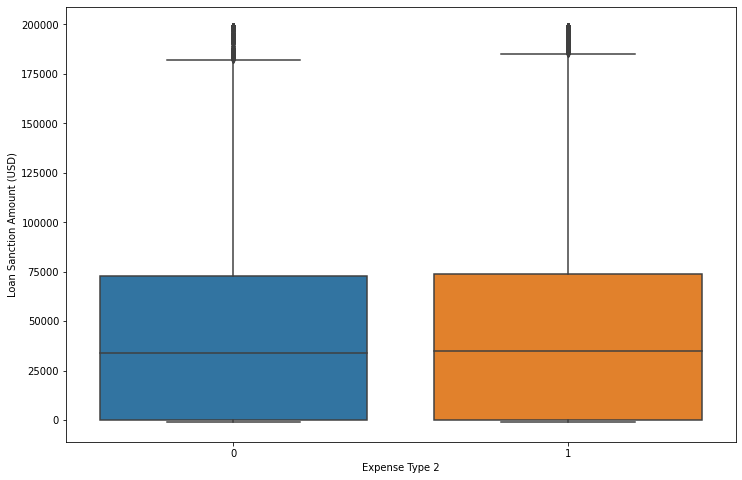

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x=train['Expense Type 2'],y=train['Loan Sanction Amount (USD)'])

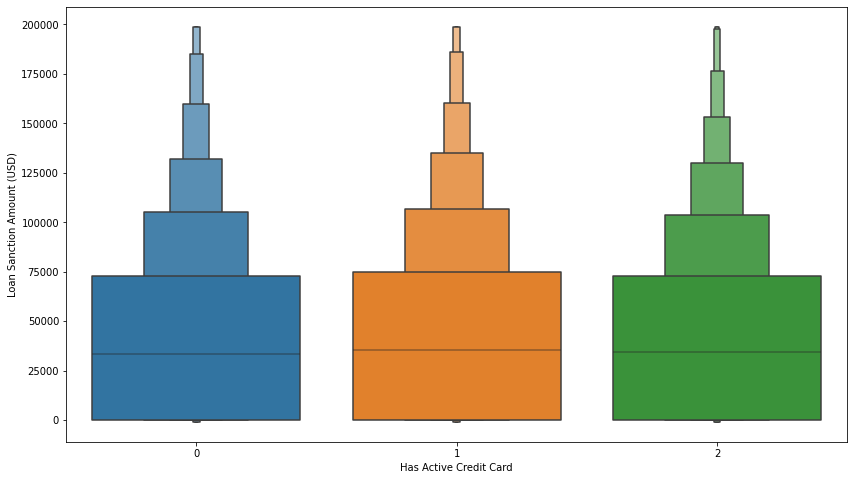

In [ ]:
plt.figure(figsize=(14,8))
sns.boxenplot(x=train['Has Active Credit Card'],y=train['Loan Sanction Amount (USD)'])

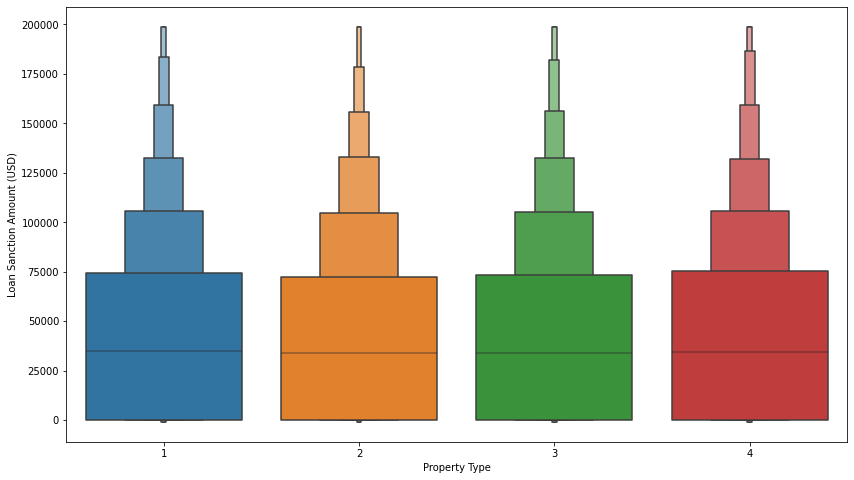

In [ ]:
plt.figure(figsize=(14,8))
sns.boxenplot(x=train['Property Type'],y=train['Loan Sanction Amount (USD)'])

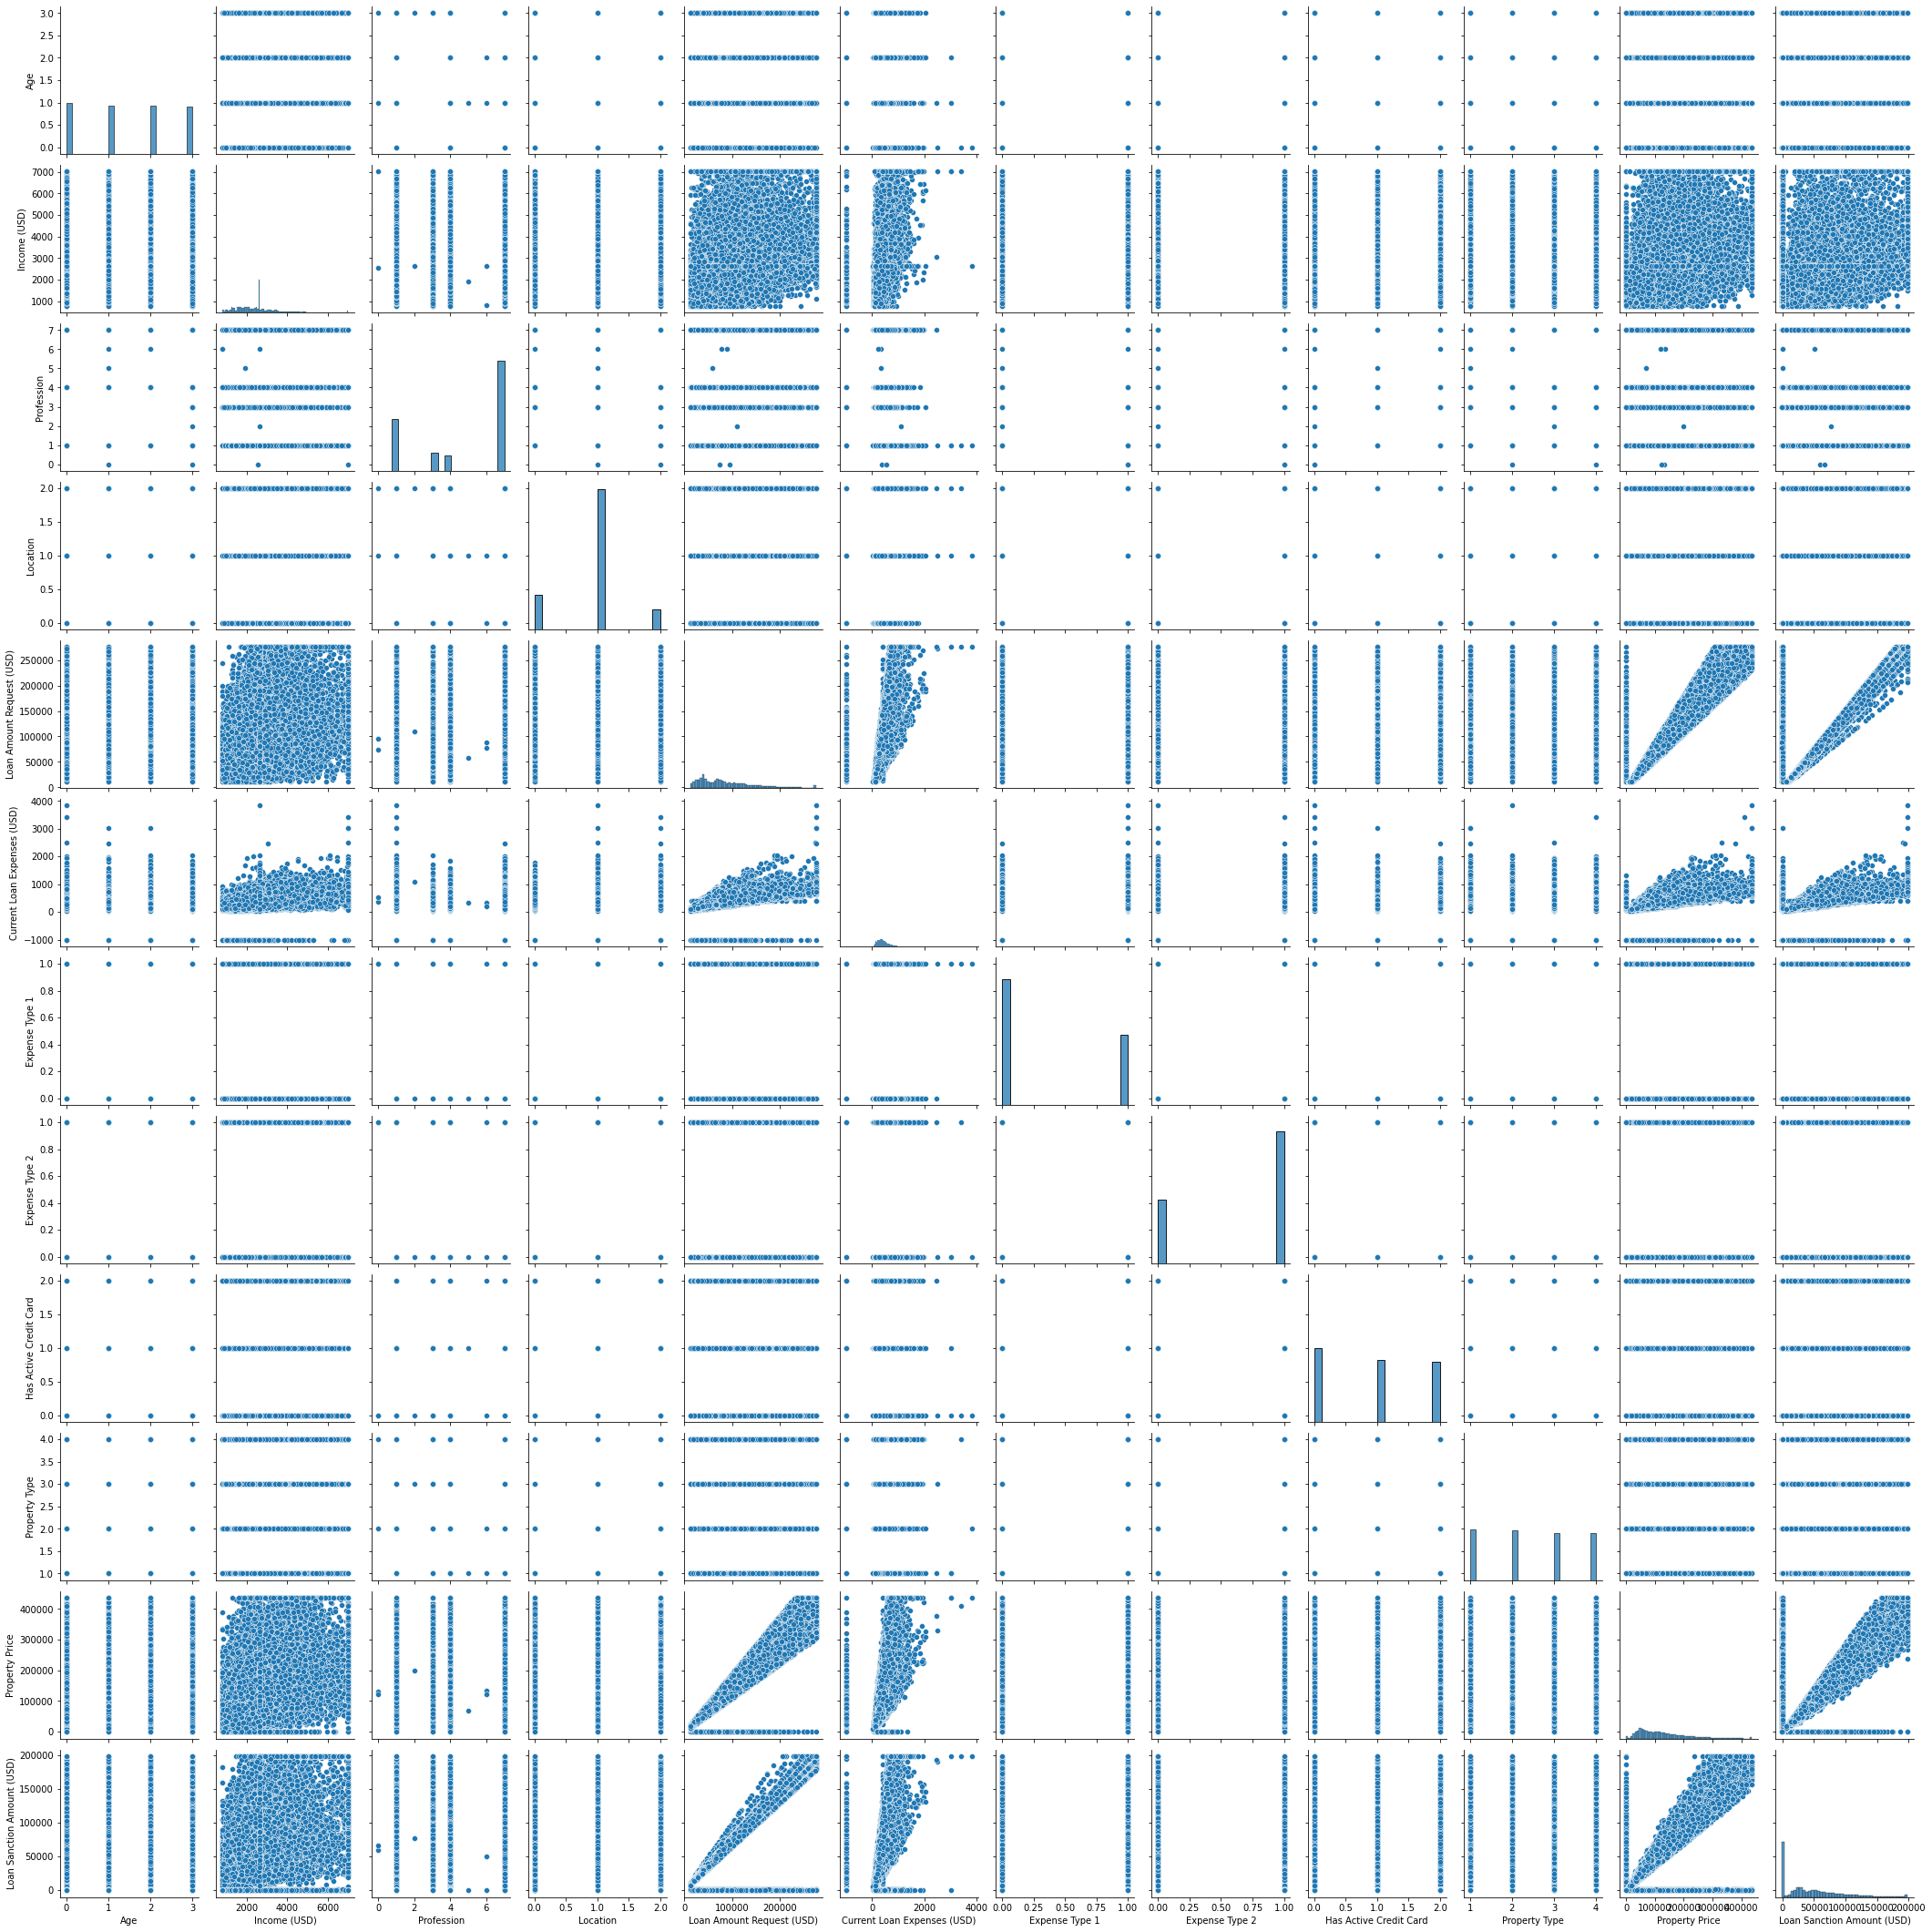

In [ ]:
sns.pairplot(train)

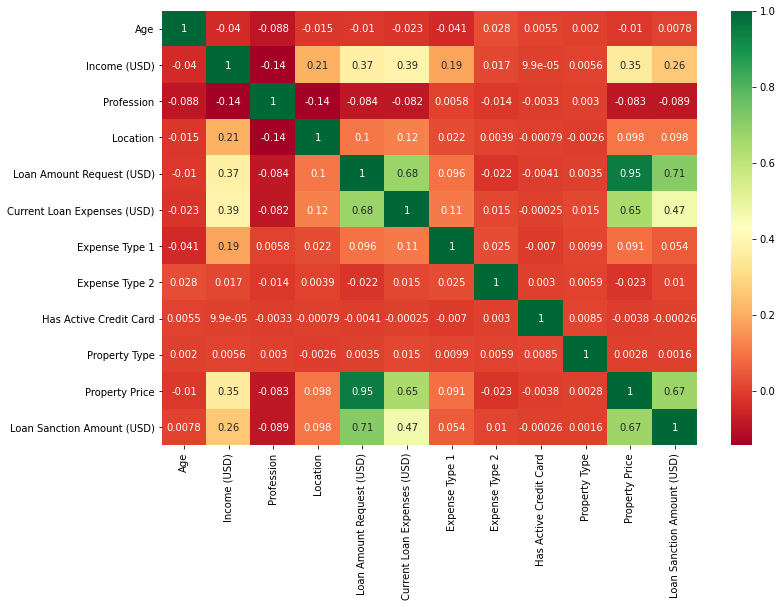

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),cmap='RdYlGn',annot=True)

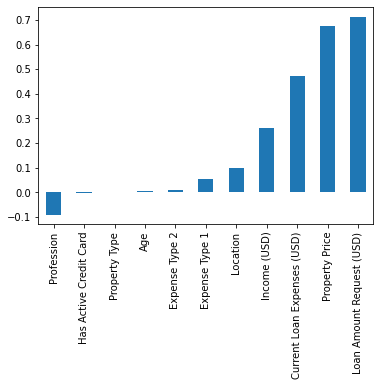

In [ ]:
#CODE HERE
train.corr()['Loan Sanction Amount (USD)'][:-1].sort_values().plot(kind='bar')#For removing last one as it would be always 1

**Testing dataset**

In [29]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [36]:
test=pd.read_csv('test.csv')
test.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,F,47,3472.69,Low,Commercial associate,Managers,Semi-Urban,137088.98,396.72,N,N,2.0,799.14,0,Unpossessed,843,3472.69,2,Urban,1,236644.5
1,C-35067,Jeannette Cha,F,57,1184.84,Low,Working,Sales staff,Rural,104771.59,463.76,Y,Y,2.0,833.31,0,Unpossessed,22,1184.84,1,Rural,1,142357.3
2,C-34590,Keva Godfrey,F,52,1266.27,Low,Working,NaN,Semi-Urban,176684.91,493.15,N,Y,3.0,627.44,0,Unpossessed,1,1266.27,1,Urban,1,300991.24
3,C-16668,Elva Sackett,M,65,1369.72,High,Pensioner,NaN,Rural,97009.18,446.15,N,Y,2.0,833.20,0,Inactive,730,1369.72,1,Semi-Urban,0,125612.1
4,C-12196,Sade Constable,F,60,1939.23,High,Pensioner,NaN,Urban,109980.00,370.10,N,N,NaN,NaN,0,NaN,356,1939.23,4,Semi-Urban,1,180908.0


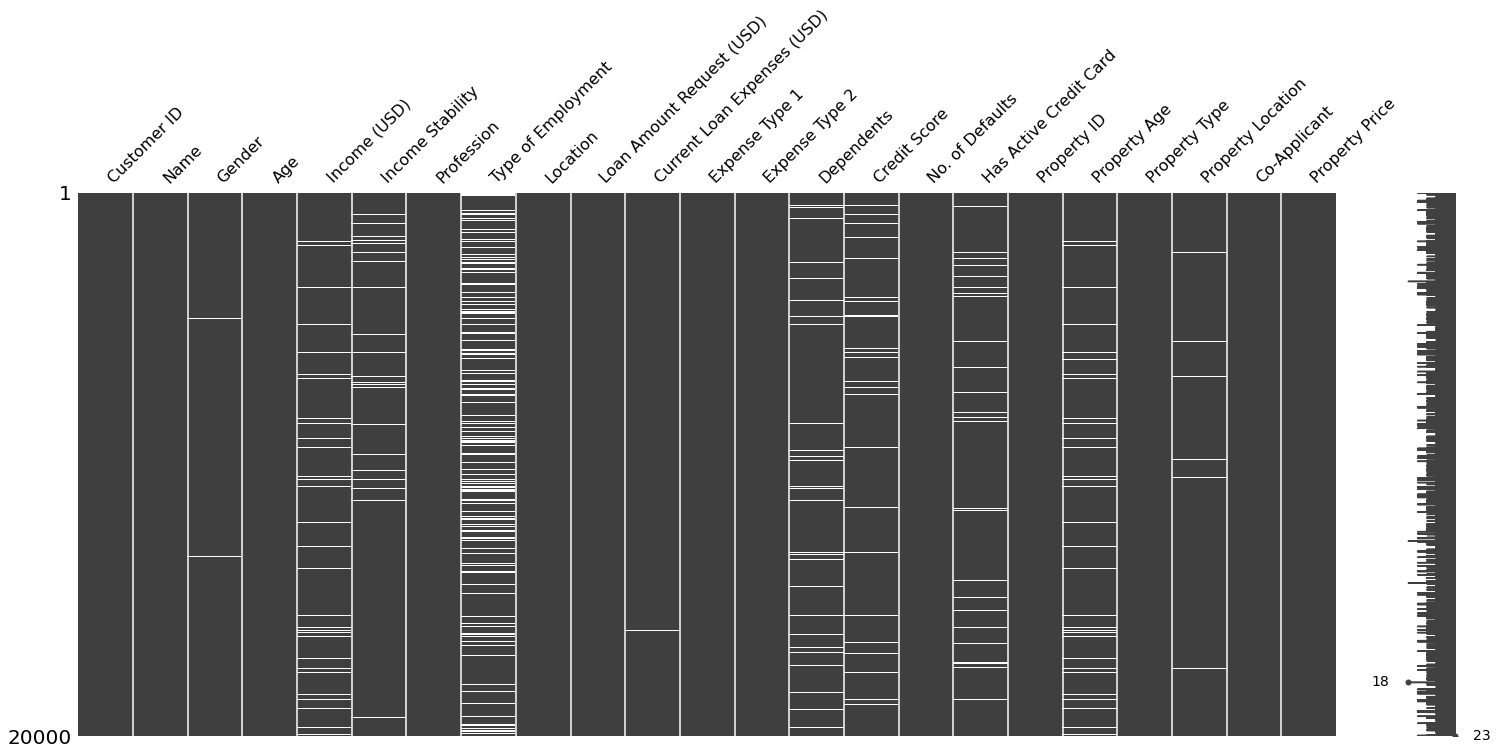

In [37]:
msno.matrix(test)

In [38]:
#Removing types of employment and property age and gender(no use according to datset) and rest because of high null values
test.drop(['Gender','Type of Employment','Property Age','Property Location','Dependents','Credit Score','Name','Property ID','Income Stability','No. of Defaults','Co-Applicant'],axis=1,inplace=True)

In [39]:
test.isnull().sum()

Customer ID                       0
Age                               0
Income (USD)                    750
Profession                        0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)      83
Expense Type 1                    0
Expense Type 2                    0
Has Active Credit Card         1076
Property Type                     0
Property Price                    0
dtype: int64

In [40]:
test['Has Active Credit Card'].fillna(random.choice(test['Has Active Credit Card'][test['Has Active Credit Card'].notna()]),inplace=True)

In [41]:
test['Property Price']=test['Property Price'].replace('?',np.nan)
test['Property Price']=test['Property Price'].astype('float64')
test['Property Price'].fillna(test['Property Price'].mean(),inplace=True)
test['Income (USD)'].fillna(test['Income (USD)'].mean(),inplace=True)
test['Current Loan Expenses (USD)'].fillna(test['Current Loan Expenses (USD)'].mean(),inplace=True)

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Income (USD)                 20000 non-null  float64
 3   Profession                   20000 non-null  object 
 4   Location                     20000 non-null  object 
 5   Loan Amount Request (USD)    20000 non-null  float64
 6   Current Loan Expenses (USD)  20000 non-null  float64
 7   Expense Type 1               20000 non-null  object 
 8   Expense Type 2               20000 non-null  object 
 9   Has Active Credit Card       20000 non-null  object 
 10  Property Type                20000 non-null  int64  
 11  Property Price               20000 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1.8+ MB


In [43]:
#Creating different buckets for age category
test['Age'] = pd.qcut(test['Age'], 4, labels=False)

In [44]:
test['Profession']= label_encoder.fit_transform(test['Profession'])
test['Location']= label_encoder.fit_transform(test['Location'])
test['Expense Type 1']= label_encoder.fit_transform(test['Expense Type 1'])
test['Expense Type 2']= label_encoder.fit_transform(test['Expense Type 2'])
test['Has Active Credit Card']= label_encoder.fit_transform(test['Has Active Credit Card'])

In [45]:
test.columns

Index(['Customer ID', 'Age', 'Income (USD)', 'Profession', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card',
       'Property Type', 'Property Price'],
      dtype='object')

In [46]:
kp1=['Age', 'Income (USD)', 'Profession', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Has Active Credit Card',
       'Property Type', 'Property Price']

In [47]:
Q1 = np.quantile(test[kp1],0.02)
Q3 = np.quantile(test[kp1],0.98)
IQR = Q3 - Q1

In [48]:
for i in test[kp1]:
    if ((test[i].skew()>1)|(test[i].skew()<-1)):
        a=test[i].quantile(0.01)
        b=test[i].quantile(0.99)
        test[i] = np.where(test[i] <a,a,test[i])
        test[i] = np.where(test[i] >b,b,test[i])
        print(i,test[i].skew())
    else:
        print(i,test[i].skew())

Age 0.04486634673688628
Income (USD) 1.446184776528923
Profession -0.5326018763735331
Location -0.08375036239166674
Loan Amount Request (USD) 1.1096542486978447
Current Loan Expenses (USD) 0.8469514645896076
Expense Type 1 0.5869969016590755
Expense Type 2 -0.7190469709805701
Has Active Credit Card 0.025565628910902236
Property Type 0.033903241474892785
Property Price 1.1777683848904166


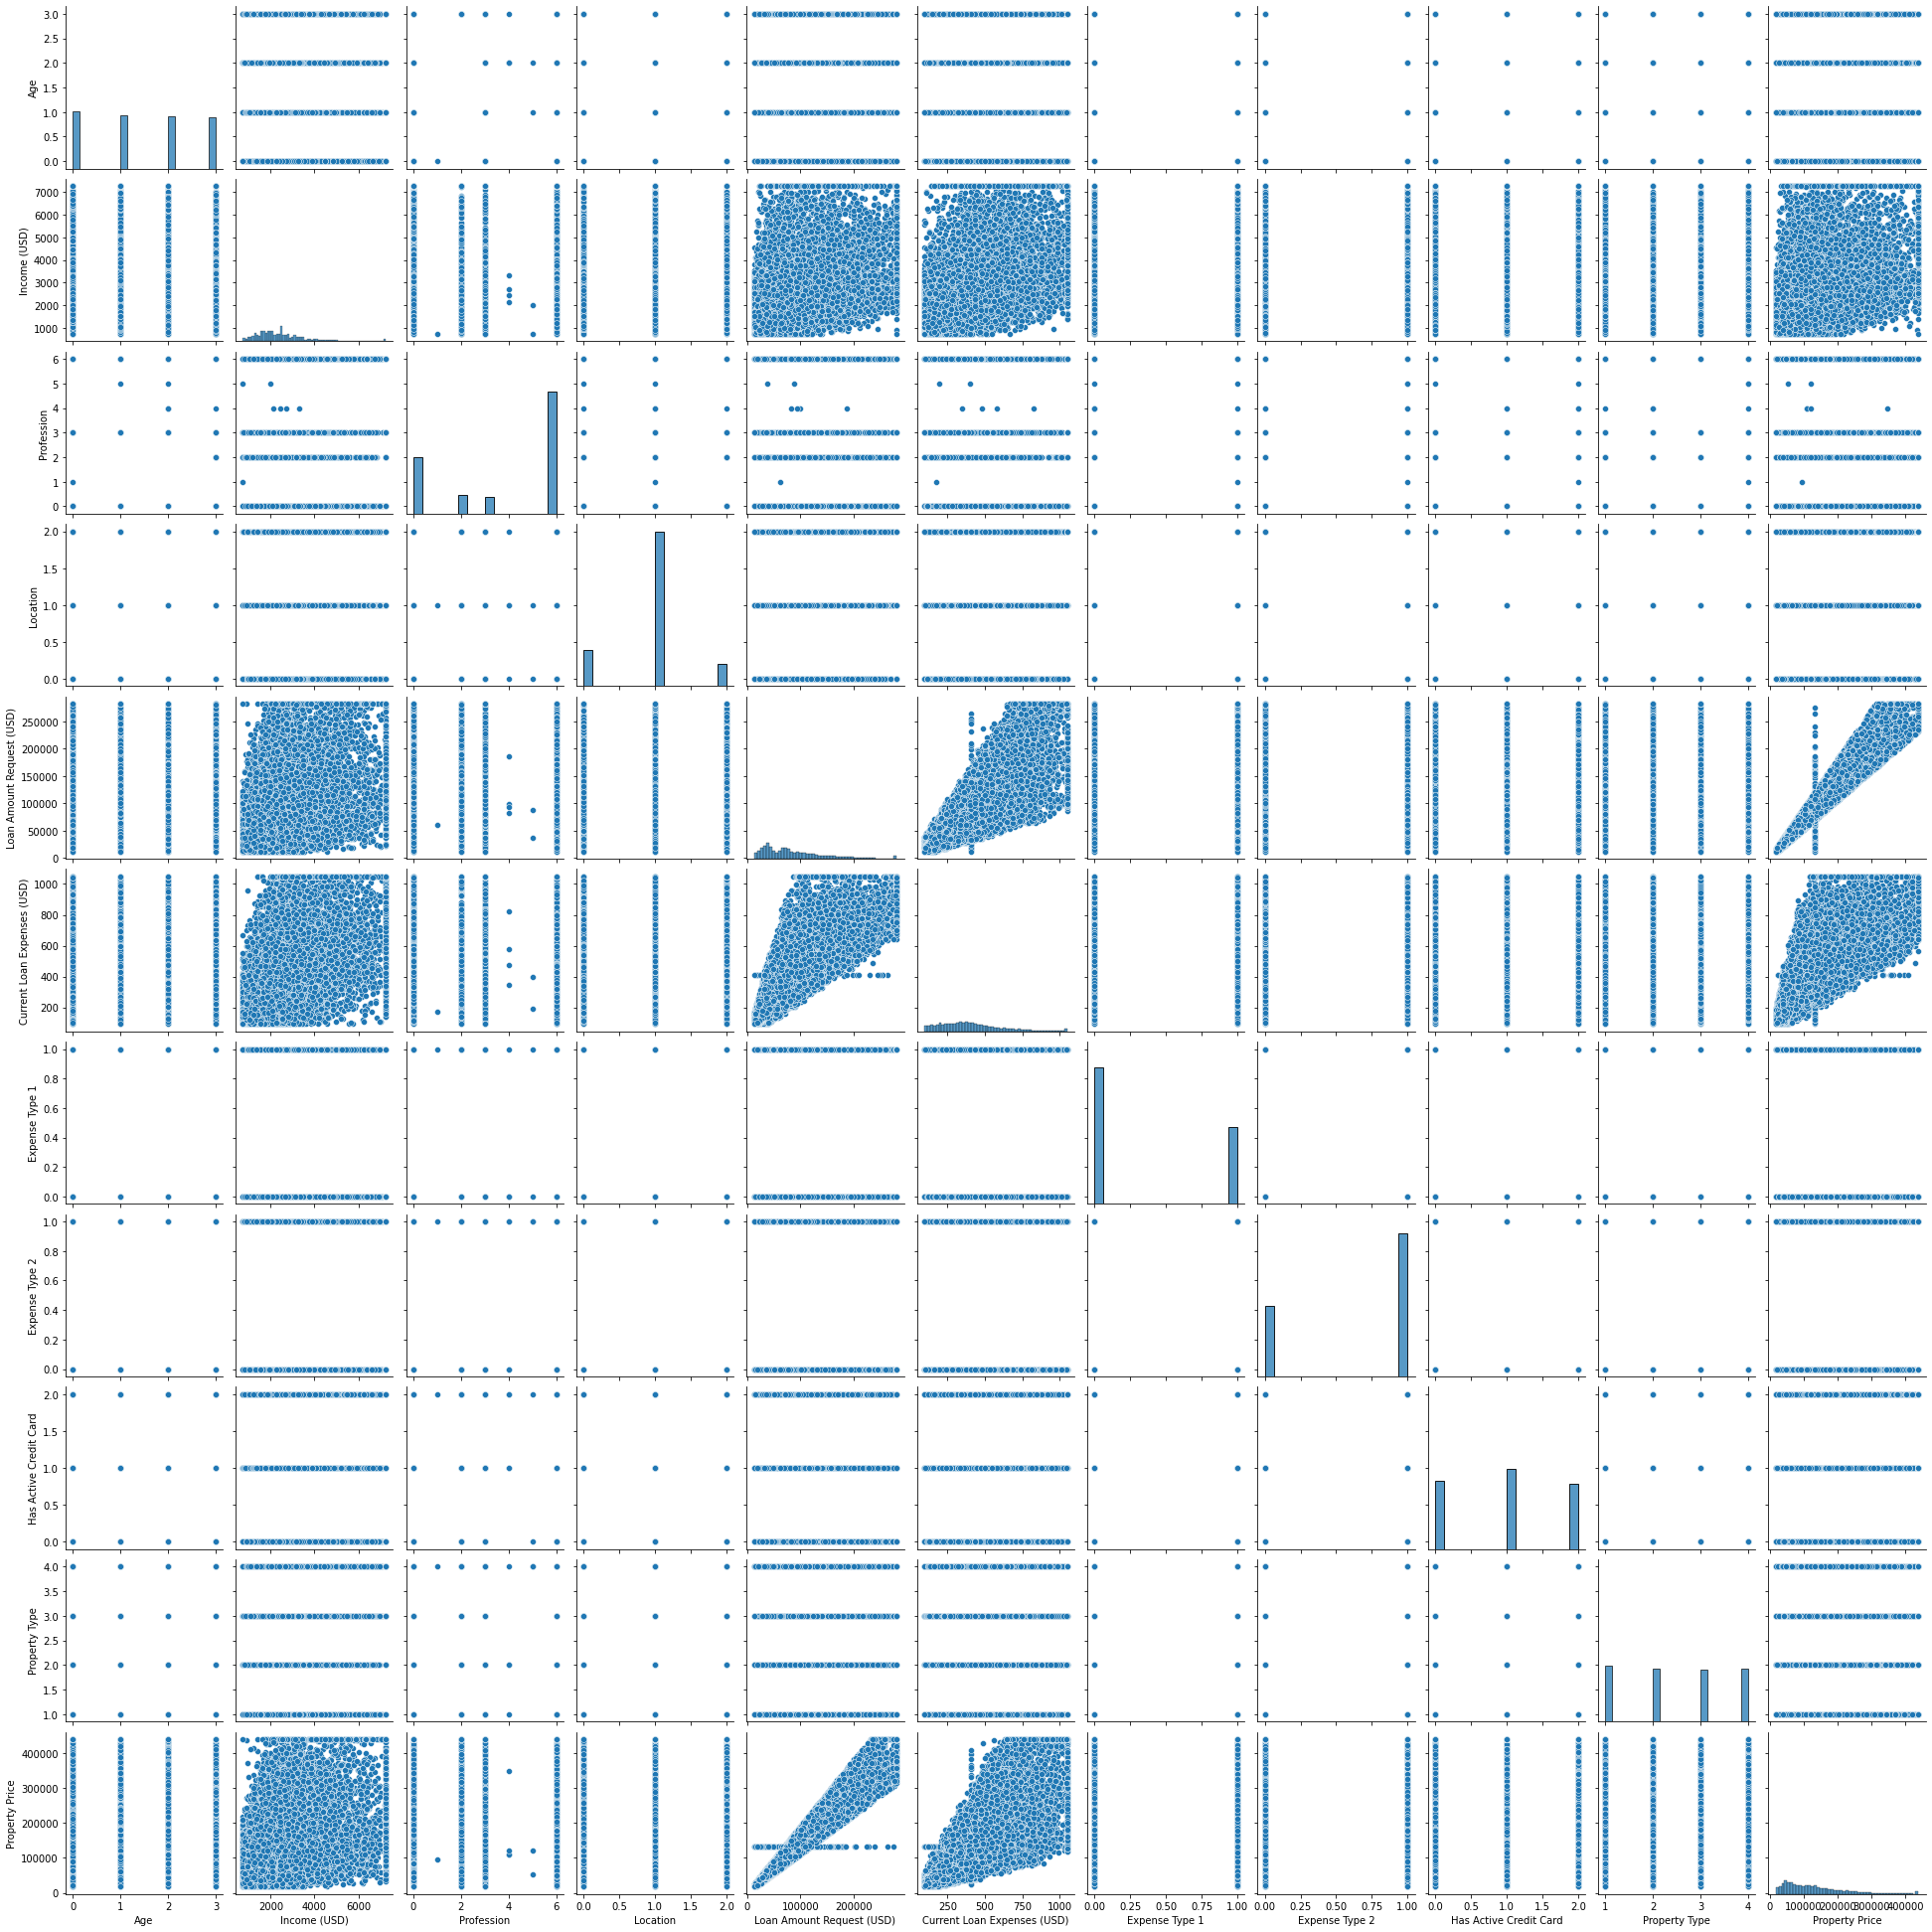

In [ ]:
sns.pairplot(test)

In [49]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Income (USD)                 20000 non-null  float64
 3   Profession                   20000 non-null  int64  
 4   Location                     20000 non-null  int64  
 5   Loan Amount Request (USD)    20000 non-null  float64
 6   Current Loan Expenses (USD)  20000 non-null  float64
 7   Expense Type 1               20000 non-null  int64  
 8   Expense Type 2               20000 non-null  int64  
 9   Has Active Credit Card       20000 non-null  int64  
 10  Property Type                20000 non-null  int64  
 11  Property Price               20000 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.8+ MB


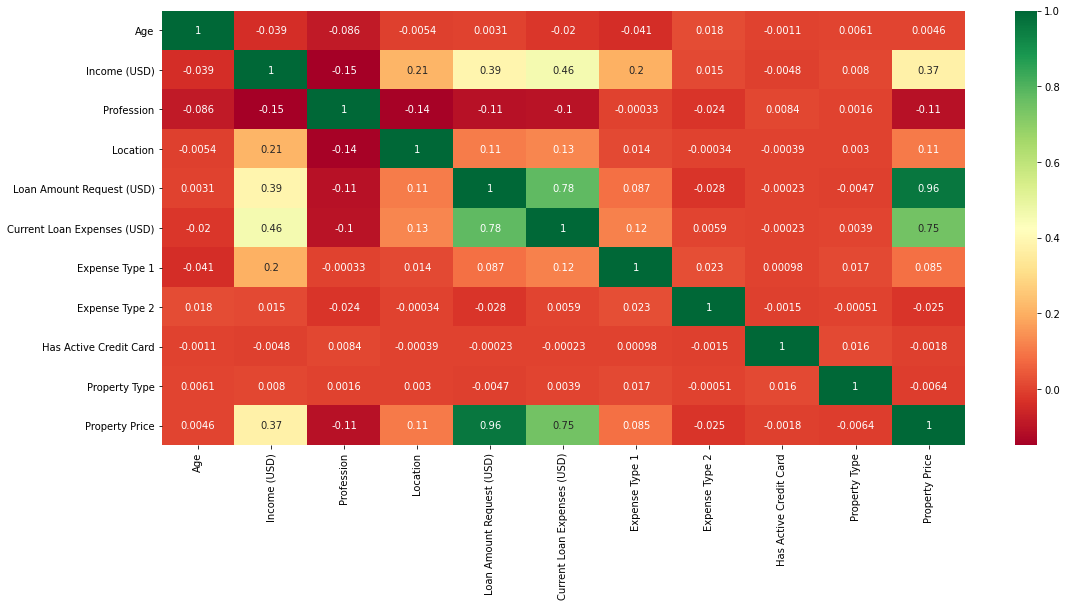

In [50]:
plt.figure(figsize=(18,8))
sns.heatmap(test.corr(),cmap='RdYlGn',annot=True)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 30000 non-null  float64
 3   Profession                   30000 non-null  int64  
 4   Location                     30000 non-null  int64  
 5   Loan Amount Request (USD)    30000 non-null  float64
 6   Current Loan Expenses (USD)  30000 non-null  float64
 7   Expense Type 1               30000 non-null  int64  
 8   Expense Type 2               30000 non-null  int64  
 9   Has Active Credit Card       30000 non-null  int64  
 10  Property Type                30000 non-null  int64  
 11  Property Price               30000 non-null  float64
 12  Loan Sanction Amount (USD)   30000 non-null  float64
dtypes: float64(5), i

In [52]:
X=train.iloc[:,1:12]
y=train['Loan Sanction Amount (USD)']

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [54]:
model.feature_importances_

array([0.04230917, 0.07383335, 0.02578266, 0.02944915, 0.39334912,
       0.0717747 , 0.02120867, 0.01648877, 0.03608882, 0.04345259,
       0.24626301])

In [55]:
#For better prediction dropping values of corr ranging from -0.1 to 0.1
X=train.drop(['Current Loan Expenses (USD)','Income (USD)','Profession','Location','Customer ID','Loan Sanction Amount (USD)','Age','Expense Type 1','Expense Type 2','Property Type','Has Active Credit Card'],1)

In [56]:
model.fit(X,y)
model.feature_importances_

array([0.60348455, 0.39651545])

In [57]:
X.drop(['Property Price'],axis=1,inplace=True)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [59]:
X

array([[-0.27005403],
       [-0.71758708],
       [-0.73903022],
       ...,
       [-0.1218563 ],
       [ 0.93121731],
       [ 1.16843087]])

In [60]:
y

0         54607.18
1         37469.98
2         36474.43
3         56040.54
4         74008.28
           ...    
29995     68992.11
29996     46616.60
29997     61057.56
29998     99766.87
29999    117217.90
Name: Loan Sanction Amount (USD), Length: 30000, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=36,shuffle=True)

In [62]:
from sklearn import linear_model, metrics
from sklearn.metrics import r2_score

In [ ]:
reg = linear_model.LinearRegression()

reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
reg.score(X_test, y_test)

0.5241761478861623

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

33151.31475726448


In [ ]:
r2_score(y_test, y_pred)

0.5241761478861623

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [ ]:
regressor.score(X_test, y_test)

0.40207774864457596

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

37162.07970623304


In [ ]:
r2_score(y_test, y_pred)

0.402077748644576

In [ ]:
y_test

17237    68728.58
10971    28999.39
8579     18814.33
792      92146.51
17953        0.00
           ...   
1874         0.00
25512        0.00
5680     43033.15
6040     25675.59
8479     43722.61
Name: Loan Sanction Amount (USD), Length: 6000, dtype: float64

In [ ]:
y_pred

array([53346.302,  3569.723, 17463.652, ..., 39703.535, 25482.931,
       26222.764])

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as mse
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05, reg_lambda=1)


xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

MSE = mse(y_test, y_pred)
RMSE = np.sqrt(MSE)

R_squared = r2_score(y_test, y_pred)
print("RMSE: ", np.round(RMSE, 2))
print("R-Squared: ", np.round(R_squared, 2))

[17:29:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "objectvie" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMSE:  33170.01
R-Squared:  0.52


In [ ]:
y_test

17237    68728.58
10971    28999.39
8579     18814.33
792      92146.51
17953        0.00
           ...   
1874         0.00
25512        0.00
5680     43033.15
6040     25675.59
8479     43722.61
Name: Loan Sanction Amount (USD), Length: 6000, dtype: float64

In [ ]:
y_pred

array([54801.367, 21618.623, 11338.9  , ..., 32389.967, 18097.078,
       30386.225], dtype=float32)

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(69):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 46909.98167378937
RMSE value for k=  2 is: 40467.87639100056
RMSE value for k=  3 is: 38538.08391745884
RMSE value for k=  4 is: 37073.846513211
RMSE value for k=  5 is: 36470.42585856761
RMSE value for k=  6 is: 36180.453534757886
RMSE value for k=  7 is: 35977.54607565032
RMSE value for k=  8 is: 35456.2972097439
RMSE value for k=  9 is: 35266.55289405585
RMSE value for k=  10 is: 35085.80884906826
RMSE value for k=  11 is: 34847.6293376452
RMSE value for k=  12 is: 34707.4315822393
RMSE value for k=  13 is: 34574.87347760666
RMSE value for k=  14 is: 34408.471602888945
RMSE value for k=  15 is: 34278.24203319533
RMSE value for k=  16 is: 34207.08523689838
RMSE value for k=  17 is: 34177.82219050795
RMSE value for k=  18 is: 34128.46385544912
RMSE value for k=  19 is: 34027.551449729144
RMSE value for k=  20 is: 33986.88009257086
RMSE value for k=  21 is: 33940.25564743579
RMSE value for k=  22 is: 33885.39153764594
RMSE value for k=  23 is: 33870.95371460653

<AxesSubplot:>

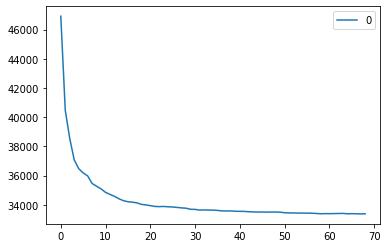

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [63]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000,num = 20)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf}
print(grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [66]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

hyp = RandomizedSearchCV(estimator = model,param_distributions=grid,
    n_iter=10,
    scoring= 'neg_mean_squared_error',
    cv=5,verbose = 2, random_state = 42,n_jobs = 1)

In [67]:
hyp.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.7s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=10, total=   1.6s
[CV] n_estimators=1300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25 
[CV]  n_estimators=1300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=25, total=  31.2s
[CV] n_estimators=1300, min_samples_split

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 16.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [68]:
y_pred = hyp.predict(X_test)

In [69]:
r2_score(y_test, y_pred)

0.5237248725490341

In [70]:
test.drop(['Property Price','Current Loan Expenses (USD)','Income (USD)','Profession','Location','Age','Expense Type 1','Expense Type 2','Property Type','Has Active Credit Card'],axis=1,inplace=True)

In [71]:
pk = scaler.fit_transform(test.iloc[:,1:])

In [72]:
kbc=hyp.predict(pk)

In [73]:
kbc

array([74456.05822464, 56174.20185574, 96715.13687074, ...,
       10706.12933942, 48374.36871296, 56612.93944224])

In [74]:
final=pd.DataFrame()

In [75]:
final['Customer ID']=test['Customer ID']

In [76]:
final['Loan Sanction Amount (USD)'] = kbc

In [77]:
final.head()

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,74456.058225
1,C-35067,56174.201856
2,C-34590,96715.136871
3,C-16668,49912.360066
4,C-12196,57775.831403


In [78]:
final.to_csv('final.csv',index=False)